In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#1. NẠP DỮ LIỆU

In [2]:
DATA_PATH = '/content/drive/MyDrive/workspace/VPBank_Hackathon/src/Data'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
crm_call_center_file = "CRM Call Center Logs.csv"
crm_events_file = "CRM Events.csv"
crm_review_file = "CRM Reviews.csv"
luxury_loan_portfolio_file = "LuxuryLoanPortfolio.csv"
completed_acct_file = "completedacct.csv"
completed_card_file = "completedcard.csv"
completed_client_file = "completedclient.csv"
completed_disposition_file = "completeddisposition.csv"
completed_loan_file = "completedloan.csv"
completed_district_file = "completeddistrict.csv"
completed_order_file = "completedorder.csv"
completed_trans_file = "completedtrans.csv"

In [5]:
crm_call_center_df = pd.read_csv(os.path.join(DATA_PATH, crm_call_center_file))
crm_events_df = pd.read_csv(os.path.join(DATA_PATH, crm_events_file))
crm_users_df = pd.read_csv(os.path.join(DATA_PATH, crm_review_file),  encoding='unicode_escape')
luxury_loan_portfolio_df = pd.read_csv(os.path.join(DATA_PATH, luxury_loan_portfolio_file))
completed_acct_df = pd.read_csv(os.path.join(DATA_PATH, completed_acct_file))
completed_card_df = pd.read_csv(os.path.join(DATA_PATH, completed_card_file))
completed_client_df = pd.read_csv(os.path.join(DATA_PATH, completed_client_file))
completed_disposition_df = pd.read_csv(os.path.join(DATA_PATH, completed_disposition_file))
completed_loan_df = pd.read_csv(os.path.join(DATA_PATH, completed_loan_file))
completed_district_df = pd.read_csv(os.path.join(DATA_PATH, completed_district_file))
completed_order_df = pd.read_csv(os.path.join(DATA_PATH, completed_order_file))
completed_trans_df = pd.read_csv(os.path.join(DATA_PATH, completed_trans_file))

<ipython-input-5-1122a20be28d>:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  completed_trans_df = pd.read_csv(os.path.join(DATA_PATH, completed_trans_file))


#2. KHẢO SÁT DỮ LIỆU CÁC BẢNG

In [6]:
def describe_df(df):
  print('information of dataframe')
  print(df.info())
  print('describe of dataframe')
  print(df.describe())

In [7]:
describe_df(crm_call_center_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date received  3999 non-null   object 
 1   Complaint ID   2504 non-null   object 
 2   rand client    2504 non-null   object 
 3   phonefinal     3999 non-null   object 
 4   vru+line       3015 non-null   object 
 5   call_id        3015 non-null   float64
 6   priority       3015 non-null   float64
 7   type           3015 non-null   object 
 8   outcome        3015 non-null   object 
 9   server         3015 non-null   object 
 10  ser_start      3999 non-null   object 
 11  ser_exit       3999 non-null   object 
 12  ser_time       3999 non-null   object 
dtypes: float64(2), object(11)
memory usage: 406.3+ KB
None
describe of dataframe
            call_id     priority
count   3015.000000  3015.000000
mean   35110.222222     0.740962
std     3962.267289     0.8

In [8]:
describe_df(completed_acct_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   object
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   parseddate   4500 non-null   object
 4   year         4500 non-null   int64 
 5   month        4500 non-null   int64 
 6   day          4500 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 246.2+ KB
None
describe of dataframe
       district_id         year        month          day
count  4500.000000  4500.000000  4500.000000  4500.000000
mean     37.310444  2015.098222     6.573556    15.030889
std      25.177217     1.483898     3.416507     8.443985
min       1.000000  2013.000000     1.000000     1.000000
25%      13.000000  2013.000000     4.000000     8.000000
50%      38.000000  2016.000000     7.000000    15.000000
75%      60.000

In [9]:
describe_df(completed_disposition_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   object
 1   client_id   5369 non-null   object
 2   account_id  5369 non-null   object
 3   type        5369 non-null   object
dtypes: object(4)
memory usage: 167.9+ KB
None
describe of dataframe
          disp_id  client_id account_id   type
count        5369       5369       5369   5369
unique       5369       5369       4500      2
top     D00000001  C00000001  A00002369  Owner
freq            1          1          2   4500


# 2.1. Dữ liệu định danh khách hàng

In [10]:
#head 10 records
completed_client_df.head(5)

,client_id,sex,fulldate,day,month,year,age,social,first,middle,last,phone,email,address_1,address_2,city,state,zipcode,district_id
0,C00000001,Female,1990-12-13,13,12,1990,29,926-93-2157,Emma,Avaya,Smith,367-171-6840,emma.smith@gmail.com,387 Wellington Ave.,Unit 1,Albuquerque,NM,47246,18
1,C00000002,Male,1965-02-04,4,2,1965,54,806-94-5725,Noah,Everest,Thompson,212-423-7734,noah.thompson@gmail.com,75 W. Berkshire St.,NaN,New York City,NY,10040,1
2,C00000003,Female,1960-10-09,9,10,1960,59,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,olivia.johnson@outlook.com,36 Second St.,NaN,New York City,NY,10162,1
3,C00000004,Male,1976-12-01,1,12,1976,43,580-20-3414,Liam,Irvin,White,951-567-8925,liam.white@gmail.com,7607 Sunnyslope Street,NaN,Indianapolis,IN,49047,5
4,C00000005,Female,1980-07-03,3,7,1980,39,536-14-5809,Sophia,Danae,Williams,428-265-1568,sophia.williams@gmail.com,755 Galvin Street,NaN,Indianapolis,IN,40852,5



Mô tả các dữ liệu:
Hiện tại, bảng có 5369 bản ghi - tương đương 5369 user. Các thông tin bảng bao gồm:
+ client_id: Mã khách hàng
+ sex: giới tính
+ fulldate: ngày tháng năm sinh
+ day: ngày sinh
+ month: tháng sinh
+ year: năm sinh
+ age: tuổi
+ social:
+ first: tên
+ middle: tên đệm
+ last: họ
+ phone: số điện thoại
+ email: email:
+ address_1: địa chỉ 1
+ address_2: địa chỉ 2
+ city: thành phố của địa chỉ 1
+ state: bảng của địa chỉ 1
+ zipcode: mã code của địa chỉ 1
+ district_id: mã huyện của địa chỉ 1

In [11]:
describe_df(completed_client_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   client_id    5369 non-null   object
 1   sex          5369 non-null   object
 2   fulldate     5369 non-null   object
 3   day          5369 non-null   int64 
 4   month        5369 non-null   int64 
 5   year         5369 non-null   int64 
 6   age          5369 non-null   int64 
 7   social       5369 non-null   object
 8   first        5369 non-null   object
 9   middle       5369 non-null   object
 10  last         5369 non-null   object
 11  phone        5369 non-null   object
 12  email        5369 non-null   object
 13  address_1    5369 non-null   object
 14  address_2    83 non-null     object
 15  city         5369 non-null   object
 16  state        5369 non-null   object
 17  zipcode      5369 non-null   int64 
 18  district_id  5369 non-null   int64 
dtypes:

Hầu hết các cột dữ liệu đều có đầy đủ bản ghi. Duy nhất có trường address_2 bị bỏ trống nhiều tỉ lệ null > 96%. Xem xét loại bỏ trường address_2.

Các trường dữ liệu có kiểu dữ liệu dạng số bao gồm: day, month, year, age, zipcode, district_id

Các trường còn lại đều là kiểu dữ liệu dạng ký tự.

In [12]:
numerical_client_df_cols = ['day', 'month', 'year', 'age', 'zipcode', 'district_id']
categorical_client_df_cols = ['sex', 'first', 'middle', 'last', 'phone', 'email', 'address_1', 'state', 'city']

In [13]:
def plot_histogram(data, title):

  sns.histplot(data=data)
  # displaying the title
  plt.title(title)
  plt.show()

def plot_bar_count(data,title, size=None):

  if size is not None:
    plt.figure(figsize =size)
  else:
    plt.figure(figsize =(14,10))
  sns.countplot(x=data, palette = "Set2")
  plt.title(title)
  plt.xticks(rotation=90)
  plt.show()

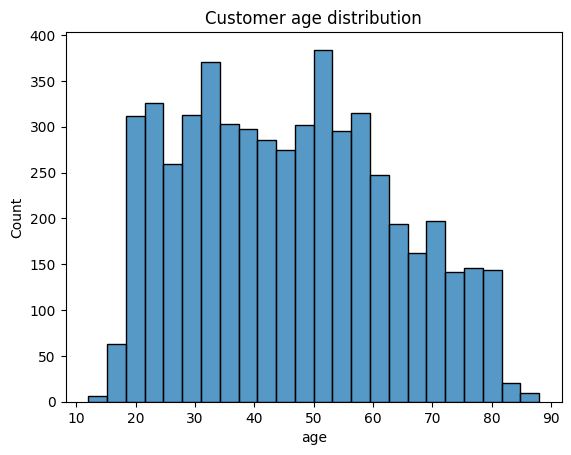

In [14]:
plot_histogram(completed_client_df['age'], 'Customer age distribution')

Nhận xét:
  - Tuổi khách hàng phân bố khá đều từ 20 đến 80 tuổi
  - các phân bố ở 2 đầu là dưới 20 và trên 80 có sô lượng tỉ lệ so với các tuổi còn lại khá thấp. Điều này phù hợp với các giới hạn tuổi người dùng có thể sử dụng tài khoản ngân hàng

<ipython-input-13-2d229fe7111e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette = "Set2")


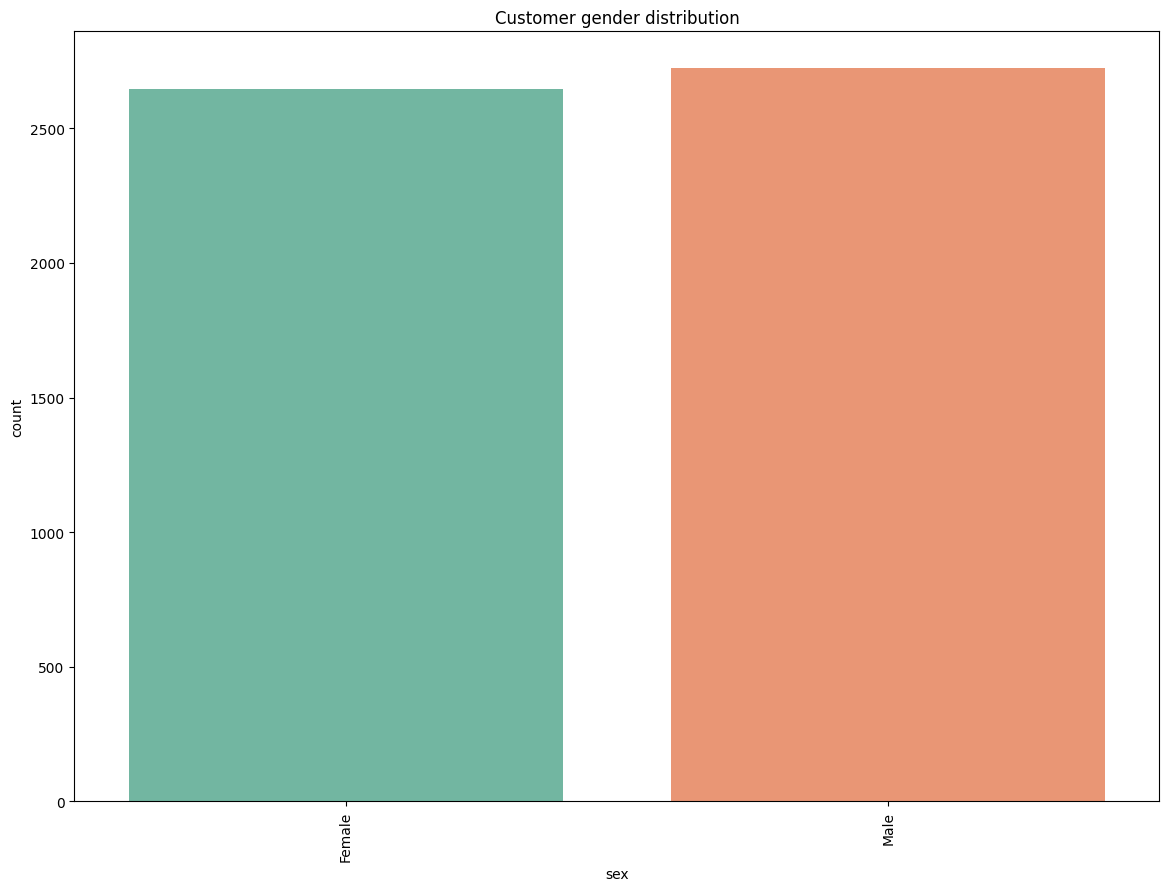

In [15]:
plot_bar_count(completed_client_df['sex'], 'Customer gender distribution')

Nhận xét:
- Phân bố về giới tính của bộ dữ liệu là đồng đều

<ipython-input-13-2d229fe7111e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette = "Set2")


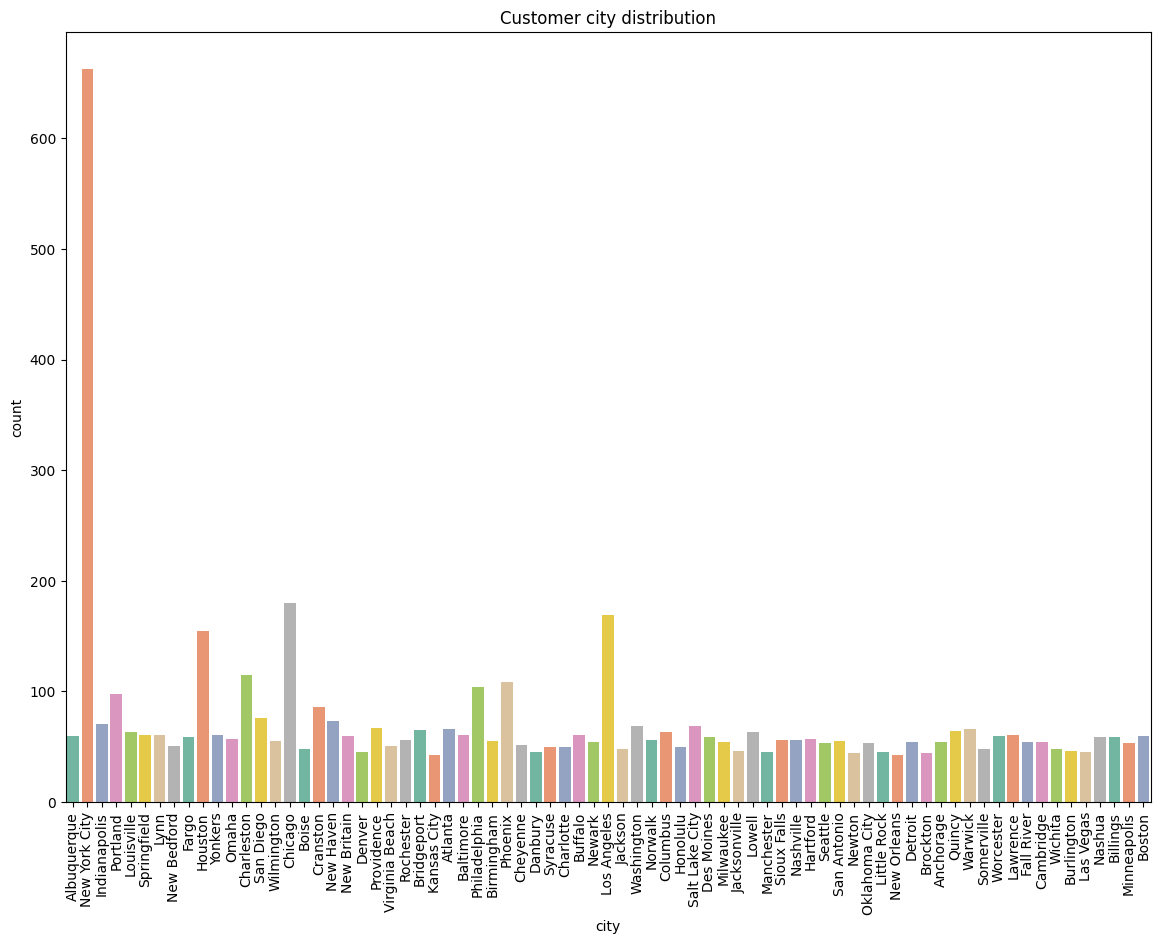

In [16]:
plot_bar_count(completed_client_df['city'], 'Customer city distribution')

Nhận xét:
- Dữ liệu địa chỉ thành phố khách hàng sinh sống cao nhất ở New York City và các thành phố lớn khác như Los Angeles, v.v...
- Các thành phố khác có mức phân bố đồng đều

# 2.2.  Dữ liệu giao dịch


In [45]:
completed_trans_df[completed_trans_df['account_id']=='A00002378']

,column_a,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime,date
0,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,2013-01-01,11:02:40,2013-01-01T11:02:40,2013-01-01
95,96,T00695250,A00002378,Credit,Credit in Cash,7268.0,7968.0,NaN,NaN,NaN,2013,1,22,2013-01-22,14:43:54,2013-01-22T14:43:54,2013-01-22
100,101,T00695266,A00002378,Credit,Credit in Cash,14440.0,22408.0,NaN,NaN,NaN,2013,1,23,2013-01-23,13:56:58,2013-01-23T13:56:58,2013-01-23
104,105,T00695262,A00002378,Credit,Credit in Cash,49752.0,72160.0,NaN,NaN,NaN,2013,1,24,2013-01-24,08:37:03,2013-01-24T08:37:03,2013-01-24
113,114,T00695265,A00002378,Credit,Credit in Cash,21899.0,94059.0,NaN,NaN,NaN,2013,1,26,2013-01-26,09:50:04,2013-01-26T09:50:04,2013-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032771,1032772,T00695647,A00002378,Credit,Credit in Cash,1900.0,39664.4,NaN,NaN,NaN,2018,12,1,2018-12-01,09:06:42,2018-12-01T09:06:42,2018-12-01
1036812,1036813,T00695410,A00002378,Debit,Remittance to Another Bank,9612.0,30052.4,Household,Citigroup,1222903.0,2018,12,7,2018-12-07,08:13:06,2018-12-07T08:13:06,2018-12-07
1049182,1049183,T00695335,A00002378,Credit,Credit in Cash,45410.0,93133.4,NaN,NaN,NaN,2018,12,21,2018-12-21,10:10:52,2018-12-21T10:10:52,2018-12-21
1049183,1049184,T00695328,A00002378,Credit,Credit in Cash,17671.0,47723.4,NaN,NaN,NaN,2018,12,21,2018-12-21,16:14:26,2018-12-21T16:14:26,2018-12-21


In [17]:
completed_trans_df.head(10)

,column_a,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime,date
0,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,2013-01-01,11:02:40,2013-01-01T11:02:40,2013-01-01
1,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,2013-01-01,08:23:33,2013-01-01T08:23:33,2013-01-01
2,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,2013-01-01,15:19:21,2013-01-01T15:19:21,2013-01-01
3,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,2013-01-01,10:42:35,2013-01-01T10:42:35,2013-01-01
4,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,2013-01-02,11:39:25,2013-01-02T11:39:25,2013-01-02
5,6,T00771035,A00002632,Credit,Credit in Cash,1100.0,1100.0,NaN,NaN,NaN,2013,1,2,2013-01-02,15:15:12,2013-01-02T15:15:12,2013-01-02
6,7,T00452728,A00001539,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,3,2013-01-03,09:34:29,2013-01-03T09:34:29,2013-01-03
7,8,T00725751,A00002484,Credit,Credit in Cash,1100.0,1100.0,NaN,NaN,NaN,2013,1,3,2013-01-03,09:36:35,2013-01-03T09:36:35,2013-01-03
8,9,T00497211,A00001695,Credit,Credit in Cash,200.0,200.0,NaN,NaN,NaN,2013,1,3,2013-01-03,15:22:23,2013-01-03T15:22:23,2013-01-03
9,10,T00232960,A00000793,Credit,Credit in Cash,800.0,800.0,NaN,NaN,NaN,2013,1,3,2013-01-03,15:08:16,2013-01-03T15:08:16,2013-01-03


Mô tả dữ liệu:
*  trans_id,T00695247,Mã giao dịch
*  account_id,A00002378,Mã tài khoản
*  type,Credit,Loại giao dịch
*  operation,Credit in Cash,Loại hoạt động (Credit in Cash: Ghi có bằng tiền mặt)
*  amount,700, Số tiền giao dịch
*  balance,700,Số dư sau giao dịch
*  k_symbol,,Ký hiệu giao dịch
*  bank,NA,Ngân hàng
*  year,2013,Năm (cập nhật)
*  month,1,Tháng (Cập nhật)
*  day,1,Ngày (Cập nhật)
*  fulldate,1/1/2013,Ngày cập nhật
*  fulltime,11:02:40,Giờ cập nhật
*  fulldatewith,time   2013-01-01T11:02:40,Thời gian cập nhật


<ipython-input-13-2d229fe7111e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette = "Set2")


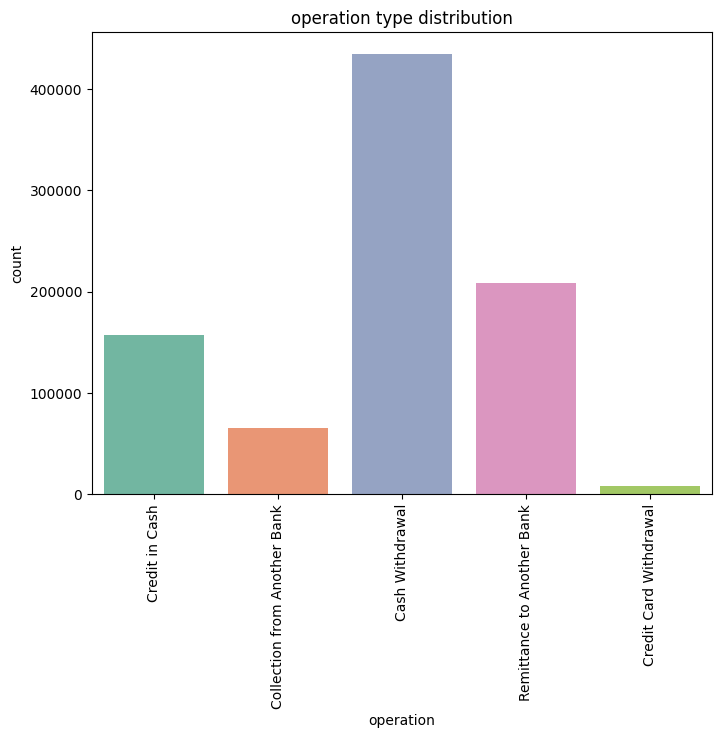

In [18]:
plot_bar_count(completed_trans_df['operation'], 'operation type distribution', size=(8,6))

In [19]:
completed_trans_df['k_symbol'].value_counts()

k_symbol
Interest Credited       183114
Payment on Statement    155832
Household               118065
                         53433
Old Age Pension          30338
Insurance Payment        18500
Loan Payment             13580
Sanction Interest         1577
Name: count, dtype: int64

In [20]:
print('Số lượng tài khoản: ', completed_trans_df['account_id'].nunique())

Số lượng tài khoản:  4500


#2.3 Dữ liệu order

In [21]:
completed_order_df[completed_order_df['account_id']=='A00000001']

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,A00000001,YZ,87144583,2452.0,Household Payment


In [22]:
completed_trans_df[(completed_trans_df['account_id'] == 'A00000001') & (completed_trans_df['k_symbol'] == 'Household')]

,column_a,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime,date
205651,205652,T00000058,A00000001,Debit,Remittance to Another Bank,2452.0,19035.3,Household,State Street Corp.,87144583.0,2015,9,5,2015-09-05,15:45:57,2015-09-05T15:45:57,2015-09-05
216709,216710,T00000059,A00000001,Debit,Remittance to Another Bank,2452.0,19639.2,Household,State Street Corp.,87144583.0,2015,10,5,2015-10-05,13:13:12,2015-10-05T13:13:12,2015-10-05
228193,228194,T00000060,A00000001,Debit,Remittance to Another Bank,2452.0,18042.1,Household,State Street Corp.,87144583.0,2015,11,5,2015-11-05,13:15:17,2015-11-05T13:15:17,2015-11-05
240223,240224,T00000061,A00000001,Debit,Remittance to Another Bank,2452.0,16569.6,Household,State Street Corp.,87144583.0,2015,12,5,2015-12-05,16:05:25,2015-12-05T16:05:25,2015-12-05
255126,255127,T00000062,A00000001,Debit,Remittance to Another Bank,2452.0,15511.0,Household,State Street Corp.,87144583.0,2016,1,5,2016-01-05,13:34:01,2016-01-05T13:34:01,2016-01-05
275121,275122,T00000063,A00000001,Debit,Remittance to Another Bank,2452.0,11127.5,Household,State Street Corp.,87144583.0,2016,2,5,2016-02-05,08:25:35,2016-02-05T08:25:35,2016-02-05
287672,287673,T00000064,A00000001,Debit,Remittance to Another Bank,2452.0,12499.6,Household,State Street Corp.,87144583.0,2016,3,5,2016-03-05,15:04:27,2016-03-05T15:04:27,2016-03-05
301001,301002,T00000065,A00000001,Debit,Remittance to Another Bank,2452.0,13977.8,Household,State Street Corp.,87144583.0,2016,4,5,2016-04-05,16:16:05,2016-04-05T16:16:05,2016-04-05
314821,314822,T00000066,A00000001,Debit,Remittance to Another Bank,2452.0,13257.7,Household,State Street Corp.,87144583.0,2016,5,5,2016-05-05,15:42:38,2016-05-05T15:42:38,2016-05-05
329300,329301,T00000067,A00000001,Debit,Remittance to Another Bank,2452.0,11973.4,Household,State Street Corp.,87144583.0,2016,6,5,2016-06-05,11:09:31,2016-06-05T11:09:31,2016-06-05


Dữ liệu transaction là dữ liệu mô tả rõ ràng các giao dịch để hoàn thành order.

Tương ứng với việc mỗi order sẽ có 1 bản ghi và có nhiều transaction

In [23]:
completed_order_df.head(5)

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,A00000001,YZ,87144583,2452.0,Household Payment
1,29402,A00000002,ST,89597016,3372.7,Loan Payment
2,29403,A00000002,QR,13943797,7266.0,Household Payment
3,29404,A00000003,WX,83084338,1135.0,Household Payment
4,29405,A00000003,CD,24485939,327.0,


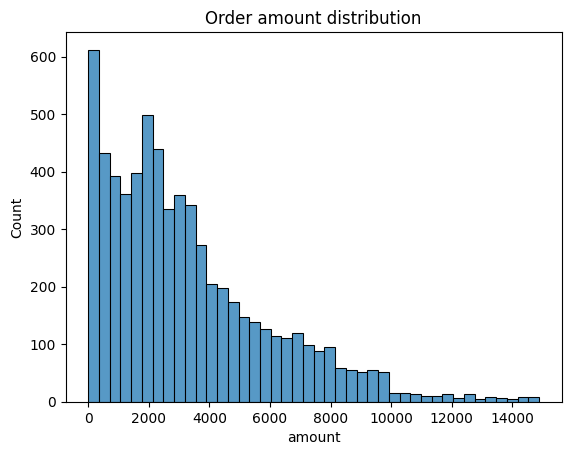

In [24]:
plot_histogram(completed_order_df['amount'], 'Order amount distribution')

Tìm hiểu mối quan hệ giữa bảng completed_loan với completed_trans

In [25]:
completed_loan_df.head(5)

,loan_id,account_id,amount,duration,payments,status,year,month,day,fulldate,location,purpose
0,L00005657,A00003354,4980,12,415,A,2014,7,5,2014-07-05,59,car
1,L00006234,A00006061,5148,12,429,C,2018,5,28,2018-05-28,1,car
2,L00006699,A00008330,7656,24,319,A,2014,3,30,2014-03-30,1,car
3,L00006688,A00008268,8616,24,359,C,2017,9,26,2017-09-26,1,car
4,L00006312,A00006453,10944,36,304,C,2018,5,17,2018-05-17,1,car


# 2.4 Dữ liệu vay


In [26]:
completed_loan_df.head(5)

,loan_id,account_id,amount,duration,payments,status,year,month,day,fulldate,location,purpose
0,L00005657,A00003354,4980,12,415,A,2014,7,5,2014-07-05,59,car
1,L00006234,A00006061,5148,12,429,C,2018,5,28,2018-05-28,1,car
2,L00006699,A00008330,7656,24,319,A,2014,3,30,2014-03-30,1,car
3,L00006688,A00008268,8616,24,359,C,2017,9,26,2017-09-26,1,car
4,L00006312,A00006453,10944,36,304,C,2018,5,17,2018-05-17,1,car


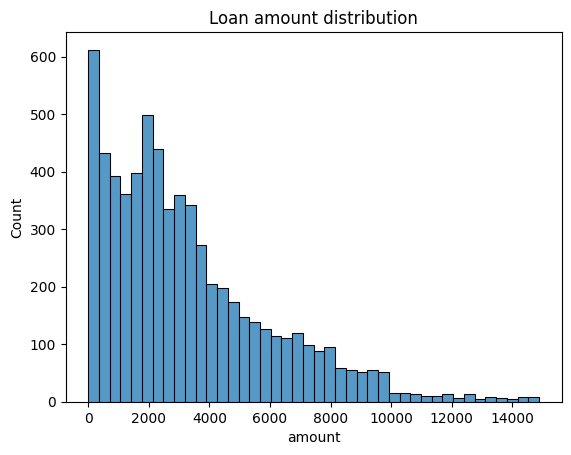

In [27]:
plot_histogram(completed_order_df['amount'], 'Loan amount distribution')

In [28]:
completed_loan_df[(completed_loan_df['account_id'] == 'A00006061')]

,loan_id,account_id,amount,duration,payments,status,year,month,day,fulldate,location,purpose
1,L00006234,A00006061,5148,12,429,C,2018,5,28,2018-05-28,1,car


In [29]:
completed_trans_df[(completed_trans_df['account_id'] == 'A00006061') & (completed_trans_df['k_symbol'] == 'Loan Payment')]

,column_a,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime,date
887021,887022,T01787073,A00006061,Debit,Remittance to Another Bank,429.0,62856.3,Loan Payment,Morgan Stanley,92930179.0,2018,6,12,2018-06-12,09:01:05,2018-06-12T09:01:05,2018-06-12
913988,913989,T01787074,A00006061,Debit,Remittance to Another Bank,429.0,37661.3,Loan Payment,Morgan Stanley,92930179.0,2018,7,12,2018-07-12,13:19:51,2018-07-12T13:19:51,2018-07-12
939576,939577,T01787075,A00006061,Debit,Remittance to Another Bank,429.0,41958.1,Loan Payment,Morgan Stanley,92930179.0,2018,8,12,2018-08-12,14:53:50,2018-08-12T14:53:50,2018-08-12
965163,965164,T01787076,A00006061,Debit,Remittance to Another Bank,429.0,44479.1,Loan Payment,Morgan Stanley,92930179.0,2018,9,12,2018-09-12,08:59:45,2018-09-12T08:59:45,2018-09-12
990605,990606,T01787077,A00006061,Debit,Remittance to Another Bank,429.0,40801.8,Loan Payment,Morgan Stanley,92930179.0,2018,10,12,2018-10-12,10:60:29,2018-10-12T10:60:29,2018-10-12
1016286,1016287,T01787078,A00006061,Debit,Remittance to Another Bank,429.0,40108.5,Loan Payment,Morgan Stanley,92930179.0,2018,11,12,2018-11-12,12:43:02,2018-11-12T12:43:02,2018-11-12
1043089,1043090,T01787079,A00006061,Debit,Remittance to Another Bank,429.0,52142.0,Loan Payment,Morgan Stanley,92930179.0,2018,12,12,2018-12-12,12:01:60,2018-12-12T12:01:60,2018-12-12


In [30]:
completed_order_df[(completed_order_df['account_id'] == 'A00006061')]

,order_id,account_id,bank_to,account_to,amount,k_symbol
5719,38373,A00006061,YZ,38191717,8521.0,Household Payment
5720,38374,A00006061,KL,92930179,429.0,Loan Payment


# 2.5 Dữ liệu về district
Dữ liệu district có thể coi là bảng dim của dữ liệu account khách hàng

In [31]:
completed_district_df

,district_id,city,state_name,state_abbrev,region,division
0,1,New York City,New York,NY,Northeast,Middle Atlantic
1,2,Jacksonville,Florida,FL,South,South Atlantic
2,3,Columbus,Ohio,OH,Midwest,East North Central
3,4,Charlotte,North Carolina,NC,South,South Atlantic
4,5,Indianapolis,Indiana,IN,Northeast,East North Central
...,...,...,...,...,...,...
72,73,New Britain,Connecticut,CT,Northeast,New England
73,74,Chicago,Illinois,IL,Northeast,East North Central
74,75,Rochester,New York,NY,Northeast,Middle Atlantic
75,76,Yonkers,New York,NY,Northeast,Middle Atlantic


# 2.6 Dữ liệu Completed disposition

In [32]:
completed_disposition_df

,disp_id,client_id,account_id,type
0,D00000001,C00000001,A00000001,Owner
1,D00000002,C00000002,A00000002,Owner
2,D00000003,C00000003,A00000002,User
3,D00000004,C00000004,A00000003,Owner
4,D00000005,C00000005,A00000003,User
...,...,...,...,...
5364,D00013647,C00013955,A00011349,Owner
5365,D00013648,C00013956,A00011349,User
5366,D00013660,C00013968,A00011359,Owner
5367,D00013663,C00013971,A00011362,Owner


In [33]:
print('Số lượng disp_id: ', completed_disposition_df['disp_id'].nunique())

Số lượng disp_id:  5369


In [34]:
print('Số lượng client_id: ', completed_disposition_df['client_id'].nunique())

Số lượng client_id:  5369


In [35]:
print('Số lượng account_id: ', completed_disposition_df['account_id'].nunique())

Số lượng account_id:  4500


1 account có thể có nhiều người dùng

# 2.7 Dữ liệu compeleted acct

In [36]:
completed_acct_df.head(5)

,account_id,district_id,frequency,parseddate,year,month,day
0,A00000576,55,Monthly Issuance,2013-01-01,2013,1,1
1,A00003818,74,Monthly Issuance,2013-01-01,2013,1,1
2,A00000704,55,Monthly Issuance,2013-01-01,2013,1,1
3,A00002378,16,Monthly Issuance,2013-01-01,2013,1,1
4,A00002632,24,Monthly Issuance,2013-01-02,2013,1,2


<ipython-input-13-2d229fe7111e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette = "Set2")


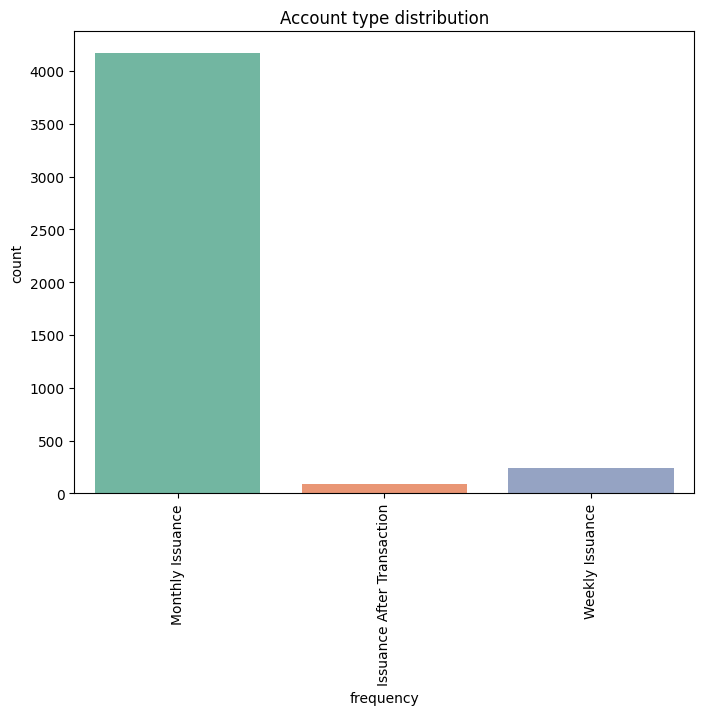

In [37]:
plot_bar_count(completed_acct_df['frequency'], 'Account type distribution', size=(8,6))

In [38]:
describe_df(completed_acct_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   object
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   parseddate   4500 non-null   object
 4   year         4500 non-null   int64 
 5   month        4500 non-null   int64 
 6   day          4500 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 246.2+ KB
None
describe of dataframe
       district_id         year        month          day
count  4500.000000  4500.000000  4500.000000  4500.000000
mean     37.310444  2015.098222     6.573556    15.030889
std      25.177217     1.483898     3.416507     8.443985
min       1.000000  2013.000000     1.000000     1.000000
25%      13.000000  2013.000000     4.000000     8.000000
50%      38.000000  2016.000000     7.000000    15.000000
75%      60.000

In [39]:
print('Số lượng account: ', completed_acct_df['account_id'].nunique())

Số lượng account:  4500


Số lượng bản ghi = với số lượng account_id. Dữ liệu này mô tả thông tin khách  hàng mở thẻ

# 2.8 Dữ liệu về card


In [40]:
completed_card_df.head(5)

,card_id,disp_id,type,year,month,day,fulldate
0,V00001005,D00009285,VISA Signature,2013,11,7,2013-11-07
1,V00000104,D00000588,VISA Signature,2014,1,19,2014-01-19
2,V00000747,D00004915,VISA Signature,2014,2,5,2014-02-05
3,V00000070,D00000439,VISA Signature,2014,2,8,2014-02-08
4,V00000577,D00003687,VISA Signature,2014,2,15,2014-02-15


In [41]:
print('Số lương thẻ: ', completed_card_df['disp_id'].nunique())

Số lương thẻ:  892


In [42]:
describe_df(completed_card_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   card_id   892 non-null    object
 1   disp_id   892 non-null    object
 2   type      892 non-null    object
 3   year      892 non-null    int64 
 4   month     892 non-null    int64 
 5   day       892 non-null    int64 
 6   fulldate  892 non-null    object
dtypes: int64(3), object(4)
memory usage: 48.9+ KB
None
describe of dataframe
              year       month         day
count   892.000000  892.000000  892.000000
mean   2017.156951    7.242152   15.954036
std       1.059417    3.394009    8.760379
min    2013.000000    1.000000    1.000000
25%    2017.000000    5.000000    8.000000
50%    2018.000000    8.000000   16.000000
75%    2018.000000   10.000000   24.000000
max    2018.000000   12.000000   31.000000


Nhận xét: Số lượng disp_ip và số lượng disp_id trong bảng completed disposition khác nhau cần xem xét ý nghĩa của 2 bảng này

2.9 Dữ liệu về luxury vay

In [43]:
luxury_loan_portfolio_df.head(5)

,loan_id,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate percent,interest rate,payments,total past payments,...,BUILDING CLASS AT PRESENT,ADDRESS 1,ADDRESS 2,ZIP CODE,CITY,STATE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
0,LL0000076,790000.0,2012-04-27,20,240,1.96,3.359,0.03359,4524.65,92,...,R1,171 SOUTH 9TH STREET,9,10001,New York City,NY,1,0,0,2
1,LL0000151,1720000.0,2014-10-14,15,180,2.21,3.508,0.03508,12302.74,62,...,R3,1242 E 80TH ST,19,10104,New York City,NY,1,0,0,1
2,LL0000161,3720000.0,2014-06-07,15,180,2.60,3.896,0.03896,27322.92,66,...,R3,1884 53RD STREET,2,10029,New York City,NY,1,0,0,1
3,LL0000175,1079000.0,2012-02-23,20,240,1.99,3.389,0.03389,6196.40,94,...,R1,79 EAGLE STREET,6,10010,New York City,NY,1,0,0,2
4,LL0000178,2028000.0,2016-04-01,20,240,1.79,3.188,0.03188,11439.05,45,...,RW,34 NORTH 7TH STREET,5,10172,New York City,NY,1,0,0,4


In [44]:
describe_df(luxury_loan_portfolio_df)

information of dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loan_id                           1678 non-null   object 
 1   funded_amount                     1678 non-null   float64
 2   funded_date                       1678 non-null   object 
 3   duration years                    1678 non-null   int64  
 4   duration months                   1678 non-null   int64  
 5   10 yr treasury index date funded  1678 non-null   float64
 6   interest rate percent             1678 non-null   float64
 7   interest rate                     1678 non-null   float64
 8   payments                          1678 non-null   float64
 9   total past payments               1678 non-null   int64  
 10  loan balance                      1678 non-null   float64
 11  property value                    1678 non-n

Dữ liệu có liên kết với bảng completed_loan_df